In [3]:
import nltk
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

In [4]:
np.random.seed(500)

In [5]:
df_tweets = pd.read_csv("gs://datasetsanalysis/Twitter_Emotion_Dataset.csv")
df_tweets.isna().sum()

label    0
tweet    0
dtype: int64

In [6]:
# tweets_data = df_tweets.drop(columns={'Unnamed: 0', 'index', 'id', 'conversation_id', 'created_at', 'timezone', 'user_id', 'name', 'place', 'mentions', \
#                                    'urls', 'photos', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo', \
#                                    'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', \
#                                    'trans_src', 'trans_dest'}, axis=1)
# tweets_data.head()
df_tweets.tail()

,label,tweet
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m..."
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ..."
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...
4400,sadness,"Ya Allah, hanya Engkau yang mengetahui rasa sa..."


In [7]:
df_tweets = df_tweets.drop_duplicates()
df_tweets.duplicated().sum()

0

In [8]:
import re
import itertools
import string
import gensim
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# !pip install sastrawi

In [10]:
factory = StopWordRemoverFactory()
sw = factory.get_stop_words()

def remove_tweet_special(text):
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"").replace('USERNAME', "").replace('-', " ").replace(',', " ")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    return text.replace("http://", " ").replace("https://", " ")
                
def remove_number(text):
    return  re.sub(r"\d+", "", text)

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

def word_tokenize_wrapper(text):
    return word_tokenize(text)


def normalizing_words(review):
    return ''.join(''.join(s)[:1] for _, s in itertools.groupby(review))

def preprocess_tweet(tweet):
    tweet.lower()
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    output = stemmer.stem(tweet)
    
    return output

In [11]:
d = {}
with open("kbba.txt") as f:
    for line in f:
        (key, val) = line.split('\t')
        d[key] = val
        d[key] = re.sub(r'\n', '', d[key])

def process(ss):
    for line in ss:
        da = ''.join(d.get(word, word) for word in re.split( '(\W+)', line))
        return da

In [12]:
df_tweets['tweet'] = df_tweets['tweet'].str.replace('[...…]','').str.split().apply(lambda x: ' '.join([d.get(e, e) for e in x]))

In [13]:
df_tweets['tweet'] = df_tweets['tweet'].apply(remove_tweet_special)
df_tweets['tweet'] = df_tweets['tweet'].apply(remove_number)
df_tweets['tweet'] = df_tweets['tweet'].apply(remove_punctuation)
df_tweets['tweet'] = df_tweets['tweet'].apply(stopwords)
df_tweets['tweet'] = df_tweets['tweet'].apply(remove_whitespace_LT)
df_tweets['tweet'] = df_tweets['tweet'].apply(remove_whitespace_multiple)

In [14]:
df_tweets.head()

,label,tweet
0,anger,soal jalan jatibaru polisi gertak gubernur ema...
1,anger,sesama cewek lho kayaknya harusnya lebih rasai...
2,happy,kepingin gudeg mbarek bu hj amad foto google s...
3,anger,jln jatibaru bagian wilayah tn abangpengaturan...
4,happy,sharing pengalaman aja kemarin jam batalin tik...


In [15]:
df_tweets['tweet_norm'] = df_tweets['tweet'].apply(preprocess_tweet)

KeyboardInterrupt: 

In [15]:
df_tweets = pd.read_csv('tweets_preprocessed.csv')
df_tweets.head()

,Unnamed: 0,label,tweet,tweet_norm
0,0,anger,soal jalan jatibaru polisi gertak gubernur ema...,soal jalan jatibaru polisi gertak gubernur ema...
1,1,anger,sesama cewek lho kayaknya harusnya lebih rasai...,sama cewek lho kayak harus lebih rasain lah si...
2,2,happy,mau gudeg mbarek bu hj amad foto google sengaj...,mau gudeg mbarek bu hj amad foto google sengaj...
3,3,anger,jalan jatibaru bagian wilayah tn abangpengatur...,jalan jatibaru bagi wilayah tn abangpengaturan...
4,4,happy,sharing pengalaman kemarin jam batalin tiket s...,sharing alam kemarin jam batalin tiket stasiun...


In [16]:
df_tweets['tweet_norm'] = df_tweets['tweet_norm'].str.replace('[...…]','').str.split().apply(lambda x: ' '.join([d.get(e, e) for e in x]))

In [17]:
df_tweets['tweet_norm_unstem'] = df_tweets['tweet'].str.replace('[...…]','').str.split().apply(lambda x: ' '.join([d.get(e, e) for e in x]))

In [18]:
def freqDist_wrapper(text):
    return FreqDist(text)

df_tweets['tweet_tokens'] = df_tweets['tweet_norm'].apply(word_tokenize_wrapper)

df_tweets['tweet_tokens_fdist'] = df_tweets['tweet_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(df_tweets['tweet_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(soal, 3), (polisi, 2), (gubernur, 2), (jalan...
1    [(rasain, 2), (sama, 1), (cewek, 1), (lho, 1),...
2    [(teman, 2), (mau, 1), (gudeg, 1), (mbarek, 1)...
3    [(wilayah, 2), (otak, 2), (jalan, 1), (jatibar...
4    [(jam, 3), (sharing, 1), (alam, 1), (kemarin, ...
Name: tweet_tokens_fdist, dtype: object


In [19]:
df_tweets.shape

(4390, 7)

In [20]:
df_tweets['tweets_norm'] = df_tweets['tweet'].apply(preprocess_tweet)

KeyboardInterrupt: 

In [21]:
df_tweets.tail()

,Unnamed: 0,label,tweet,tweet_norm,tweet_norm_unstem,tweet_tokens,tweet_tokens_fdist
4385,4396,love,tahukah kamu papa memejamkan matanya menahan g...,tahu kamu papa mejam mata tahan gejolak batin ...,tahukah kamu papa memejamkan matanya menahan g...,"[tahu, kamu, papa, mejam, mata, tahan, gejolak...","{'tahu': 1, 'kamu': 1, 'papa': 2, 'mejam': 1, ..."
4386,4397,fear,sulitnya menetapkan calon wapresnya jokowi pil...,sulit tetap calon wapresnya jokowi pilpres sal...,sulitnya menetapkan calon wapresnya jokowi pil...,"[sulit, tetap, calon, wapresnya, jokowi, pilpr...","{'sulit': 1, 'tetap': 2, 'calon': 1, 'wapresny..."
4387,4398,anger,masa depannya jelas lha iya bagaimana mau jela...,masa depan jelas lha iya bagaimana mau jelas c...,masa depannya jelas lha iya bagaimana mau jela...,"[masa, depan, jelas, lha, iya, bagaimana, mau,...","{'masa': 1, 'depan': 1, 'jelas': 2, 'lha': 1, ..."
4388,4399,happy,dulu beneran mahasiswa teknik ui menyatakan ci...,dulu beneran mahasiswa teknik ui nyata cinta p...,dulu beneran mahasiswa teknik ui menyatakan ci...,"[dulu, beneran, mahasiswa, teknik, ui, nyata, ...","{'dulu': 1, 'beneran': 1, 'mahasiswa': 1, 'tek..."
4389,4400,sadness,allah engkau mengetahui rasa sakit hati sembuh...,allah engkau tahu rasa sakit hati sembuh allah,allah engkau mengetahui rasa sakit hati sembuh...,"[allah, engkau, tahu, rasa, sakit, hati, sembu...","{'allah': 2, 'engkau': 1, 'tahu': 1, 'rasa': 1..."


In [22]:
def Clean_length(token):
    return [i for i in token if len(i) > 3]
def convert_to_string(listReview):
    return ' '.join(listReview)

df_tweets['tweet_norm2'] = df_tweets['tweet_norm'].apply(word_tokenize_wrapper)
df_tweets['tweet_norm2'] = df_tweets['tweet_norm2'].apply(Clean_length)
df_tweets['tweet_norm2'] = df_tweets['tweet_norm2'].apply(convert_to_string)
df_tweets['tweet_norm_unstem'] = df_tweets['tweet'].apply(word_tokenize_wrapper)
df_tweets['tweet_norm_unstem'] = df_tweets['tweet_norm_unstem'].apply(Clean_length)
df_tweets['tweet_norm_unstem'] = df_tweets['tweet_norm_unstem'].apply(convert_to_string)
df_tweets['tweet_norm_unstem'] = df_tweets['tweet_norm_unstem'].apply(stopwords)

In [23]:
df_tweets

,Unnamed: 0,label,tweet,tweet_norm,tweet_norm_unstem,tweet_tokens,tweet_tokens_fdist,tweet_norm2
0,0,anger,soal jalan jatibaru polisi gertak gubernur ema...,soal jalan jatibaru polisi gertak gubernur ema...,soal jalan jatibaru polisi gertak gubernur ema...,"[soal, jalan, jatibaru, polisi, gertak, gubern...","{'soal': 3, 'jalan': 1, 'jatibaru': 1, 'polisi...",soal jalan jatibaru polisi gertak gubernur ema...
1,1,anger,sesama cewek lho kayaknya harusnya lebih rasai...,sama cewek lho kayak harus lebih rasain lah si...,sesama cewek kayaknya harusnya lebih rasain si...,"[sama, cewek, lho, kayak, harus, lebih, rasain...","{'sama': 1, 'cewek': 1, 'lho': 1, 'kayak': 1, ...",sama cewek kayak harus lebih rasain sibuk jaga...
2,2,happy,mau gudeg mbarek bu hj amad foto google sengaj...,mau gudeg mbarek bu hj amad foto google sengaj...,gudeg mbarek amad foto google sengaja biar tem...,"[mau, gudeg, mbarek, bu, hj, amad, foto, googl...","{'mau': 1, 'gudeg': 1, 'mbarek': 1, 'bu': 1, '...",gudeg mbarek amad foto google sengaja biar tem...
3,3,anger,jalan jatibaru bagian wilayah tn abangpengatur...,jalan jatibaru bagi wilayah tn abangpengaturan...,jalan jatibaru bagian wilayah abangpengaturan ...,"[jalan, jatibaru, bagi, wilayah, tn, abangpeng...","{'jalan': 1, 'jatibaru': 1, 'bagi': 1, 'wilaya...",jalan jatibaru bagi wilayah abangpengaturan wi...
4,4,happy,sharing pengalaman kemarin jam batalin tiket s...,sharing alam kemarin jam batalin tiket stasiun...,sharing pengalaman kemarin batalin tiket stasi...,"[sharing, alam, kemarin, jam, batalin, tiket, ...","{'sharing': 1, 'alam': 1, 'kemarin': 1, 'jam':...",sharing alam kemarin batalin tiket stasiun pas...
...,...,...,...,...,...,...,...,...
4385,4396,love,tahukah kamu papa memejamkan matanya menahan g...,tahu kamu papa mejam mata tahan gejolak batin ...,tahukah kamu papa memejamkan matanya menahan g...,"[tahu, kamu, papa, mejam, mata, tahan, gejolak...","{'tahu': 1, 'kamu': 1, 'papa': 2, 'mejam': 1, ...",tahu kamu papa mejam mata tahan gejolak batin ...
4386,4397,fear,sulitnya menetapkan calon wapresnya jokowi pil...,sulit tetap calon wapresnya jokowi pilpres sal...,sulitnya menetapkan calon wapresnya jokowi pil...,"[sulit, tetap, calon, wapresnya, jokowi, pilpr...","{'sulit': 1, 'tetap': 2, 'calon': 1, 'wapresny...",sulit tetap calon wapresnya jokowi pilpres sal...
4387,4398,anger,masa depannya jelas lha iya bagaimana mau jela...,masa depan jelas lha iya bagaimana mau jelas c...,masa depannya jelas bagaimana jelas coba lulus...,"[masa, depan, jelas, lha, iya, bagaimana, mau,...","{'masa': 1, 'depan': 1, 'jelas': 2, 'lha': 1, ...",masa depan jelas bagaimana jelas coba lulus se...
4388,4399,happy,dulu beneran mahasiswa teknik ui menyatakan ci...,dulu beneran mahasiswa teknik ui nyata cinta p...,dulu beneran mahasiswa teknik menyatakan cinta...,"[dulu, beneran, mahasiswa, teknik, ui, nyata, ...","{'dulu': 1, 'beneran': 1, 'mahasiswa': 1, 'tek...",dulu beneran mahasiswa teknik nyata cinta paca...


In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [25]:
!kaggle datasets download -d ilhamfp31/word2vec-100-indonesian

word2vec-100-indonesian.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
!unzip word2vec-100-indonesian.zip

Archive:  word2vec-100-indonesian.zip
replace idwiki_word2vec_100.model? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [27]:
path = '../word2vec/idwiki_word2vec_100.model'
id_w2v = gensim.models.word2vec.Word2Vec.load(path)
print(id_w2v.most_similar('cewe'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('cewek', 0.8540853261947632), ('cowo', 0.8269037008285522), ('cowok', 0.8111810684204102), ('temen', 0.779466986656189), ('bule', 0.7218682765960693), ('abis', 0.7044062614440918), ('mupeng', 0.6950250267982483), ('tuh', 0.6821547746658325), ('ceweknya', 0.6821222305297852), ('banget', 0.6735192537307739)]


In [28]:
unique_string = set()
for x in df_tweets['tweet_norm2']:
    for y in x.split():
        unique_string.add(y)
        
len(unique_string)

11997

In [29]:
df_tweets['label_id'] = df_tweets['label'].factorize()[0]
from io import StringIO
kategori_id_data = df_tweets[['label', 'label_id']].drop_duplicates().sort_values('label_id')
kategori_to_id = dict(kategori_id_data.values)
id_to_kategori = dict(kategori_id_data[['label_id', 'label']].values)

In [30]:
y_list = list(df_tweets['label_id'])
y_new = np.array(y_list)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_tweets['tweet_norm2'], y_new, test_size=0.1, random_state=0)

In [32]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
Train_X_Tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [33]:
# print(Tfidf_vect.vocabulary_)

In [34]:
LR_model = LogisticRegression(solver='lbfgs', max_iter=15000)
LR_model.fit(Train_X_Tfidf, y_train)

LogisticRegression(max_iter=15000)

In [35]:
a = count_vect.transform(X_test)
Test_X_Tfidf = tfidf_transformer.fit_transform(a).toarray()

y_pred = LR_model.predict(Test_X_Tfidf)


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_pred, y_test) * 100)

[[79  6 11  1  1]
 [11 68 19  2  2]
 [24 21 55  7  4]
 [ 4  7 11 45  1]
 [11  3  7  2 37]]
              precision    recall  f1-score   support

           0       0.61      0.81      0.70        98
           1       0.65      0.67      0.66       102
           2       0.53      0.50      0.51       111
           3       0.79      0.66      0.72        68
           4       0.82      0.62      0.70        60

    accuracy                           0.65       439
   macro avg       0.68      0.65      0.66       439
weighted avg       0.66      0.65      0.65       439

64.69248291571755


In [37]:
clf = MultinomialNB().fit(Train_X_Tfidf, y_train)

In [38]:
y_pred2 = clf.predict(Test_X_Tfidf)

In [39]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test, y_pred2))

[[84  3 11  0  0]
 [17 65 18  1  1]
 [28 13 67  2  1]
 [11  9 24 24  0]
 [20  3 16  1 20]]
              precision    recall  f1-score   support

           0       0.53      0.86      0.65        98
           1       0.70      0.64      0.67       102
           2       0.49      0.60      0.54       111
           3       0.86      0.35      0.50        68
           4       0.91      0.33      0.49        60

    accuracy                           0.59       439
   macro avg       0.70      0.56      0.57       439
weighted avg       0.66      0.59      0.58       439

0.592255125284738


In [40]:
SVM_model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_model.fit(Train_X_Tfidf, y_train) 

SVC(gamma='auto', kernel='linear')

In [41]:
y_pred3 = SVM_model.predict(Test_X_Tfidf)

In [42]:
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test, y_pred3))

[[73  6 16  1  2]
 [10 66 18  4  4]
 [24 18 57  8  4]
 [ 5  4 11 47  1]
 [11  3  9  2 35]]
              precision    recall  f1-score   support

           0       0.59      0.74      0.66        98
           1       0.68      0.65      0.66       102
           2       0.51      0.51      0.51       111
           3       0.76      0.69      0.72        68
           4       0.76      0.58      0.66        60

    accuracy                           0.63       439
   macro avg       0.66      0.64      0.64       439
weighted avg       0.64      0.63      0.63       439

0.6332574031890661


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [44]:
Ks = 1000
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(Train_X_Tfidf, y_train)
    yhat_knn=neigh.predict(Test_X_Tfidf)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)
    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])

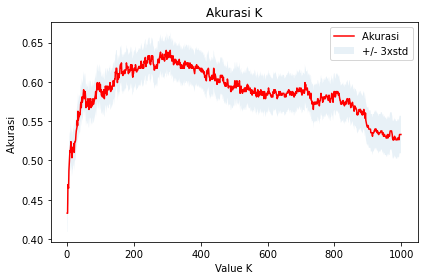

In [45]:
plt.plot(range(1, Ks), mean_acc, 'r')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Akurasi ', '+/- 3xstd'))
plt.ylabel('Akurasi ')
plt.xlabel('Value K')
plt.title('Akurasi K')
plt.tight_layout()
plt.show()

In [46]:
print("Akurasi tertinggi adalah %.2f"% mean_acc.max(), "dengan nilai K=", mean_acc.argmax()+1) 

Akurasi tertinggi adalah 0.64 dengan nilai K= 297


In [47]:
kNN_model = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(Train_X_Tfidf, y_train)
yhat_knn=neigh.predict(Test_X_Tfidf)

In [48]:
print(confusion_matrix(y_test,yhat_knn))
print(classification_report(y_test,yhat_knn))
print(accuracy_score(y_test, yhat_knn))

[[87  4  5  2  0]
 [38 41 16  6  1]
 [64  7 29  9  2]
 [ 8  4  4 51  1]
 [22  1  9  2 26]]
              precision    recall  f1-score   support

           0       0.40      0.89      0.55        98
           1       0.72      0.40      0.52       102
           2       0.46      0.26      0.33       111
           3       0.73      0.75      0.74        68
           4       0.87      0.43      0.58        60

    accuracy                           0.53       439
   macro avg       0.63      0.55      0.54       439
weighted avg       0.60      0.53      0.52       439

0.5330296127562643


In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DT.fit(Train_X_Tfidf, y_train)
predDT = DT.predict(Test_X_Tfidf)

In [51]:
print("Akurasi Decision Tree: ", metrics.accuracy_score(y_test, predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))
print(accuracy_score(y_test, predDT))

Akurasi Decision Tree:  0.4328018223234624
[[95  0  0  2  1]
 [81 14  0  5  2]
 [97  1  0 10  3]
 [11  4  3 50  0]
 [26  1  0  2 31]]
              precision    recall  f1-score   support

           0       0.31      0.97      0.47        98
           1       0.70      0.14      0.23       102
           2       0.00      0.00      0.00       111
           3       0.72      0.74      0.73        68
           4       0.84      0.52      0.64        60

    accuracy                           0.43       439
   macro avg       0.51      0.47      0.41       439
weighted avg       0.46      0.43      0.36       439

0.4328018223234624


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
RF = RandomForestClassifier()
RF.fit(Train_X_Tfidf,y_train)
pred_RF=RF.predict(Test_X_Tfidf)

In [54]:
print(confusion_matrix(y_test,pred_RF))
print(classification_report(y_test,pred_RF))
print(accuracy_score(y_test, pred_RF))

[[74  9 13  1  1]
 [19 67 11  4  1]
 [35 18 44 10  4]
 [ 4  4  5 54  1]
 [11  3  8  2 36]]
              precision    recall  f1-score   support

           0       0.52      0.76      0.61        98
           1       0.66      0.66      0.66       102
           2       0.54      0.40      0.46       111
           3       0.76      0.79      0.78        68
           4       0.84      0.60      0.70        60

    accuracy                           0.63       439
   macro avg       0.66      0.64      0.64       439
weighted avg       0.64      0.63      0.62       439

0.6264236902050114


In [56]:
test =['hari ini sangat indah',
       'kok kamu jelek bgt sih',
       'ada berita duka yang menyedihkan',
       'bagaimana kabar hari ini?',
       'semua baik-baik2 saja kan',
      'kenapa kamu sebodoh itu?',
      'kabar jogja hari ini',
      'kapan corona nya pergi',
      'aku takut dengan corona',
      'kamu sayang sama aku?',
      'aku sangat bahagia hari ini']

for i in test :
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.fit_transform(a).toarray()
    y_pred = clf.predict(X_coba)
    if y_pred[0]== 0 :
        label = 'anger'
    elif y_pred[0]== 1 :
        label = 'happy'
    elif y_pred[0]== 2 :
        label = 'sadness'
    elif y_pred[0]== 3 :
        label = 'love'
    else :
        label = 'fear'
    print ({"teks": i , "label" : label})

{'teks': 'hari ini sangat indah', 'label': 'happy'}
{'teks': 'kok kamu jelek bgt sih', 'label': 'anger'}
{'teks': 'ada berita duka yang menyedihkan', 'label': 'sadness'}
{'teks': 'bagaimana kabar hari ini?', 'label': 'sadness'}
{'teks': 'semua baik-baik2 saja kan', 'label': 'happy'}
{'teks': 'kenapa kamu sebodoh itu?', 'label': 'anger'}
{'teks': 'kabar jogja hari ini', 'label': 'sadness'}
{'teks': 'kapan corona nya pergi', 'label': 'sadness'}
{'teks': 'aku takut dengan corona', 'label': 'fear'}
{'teks': 'kamu sayang sama aku?', 'label': 'love'}
{'teks': 'aku sangat bahagia hari ini', 'label': 'happy'}


In [57]:
y_pred[0]

1

In [58]:
print(Test_X_Tfidf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:
for i in test :
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.fit_transform(a).toarray()
    y_pred = clf.predict(X_coba)
    if y_pred[0]== 0 :
        label = 'anger'
    elif y_pred[0]== 1 :
        label = 'happy'
    elif y_pred[0]== 2 :
        label = 'sadness'
    elif y_pred[0]== 3 :
        label = 'love'
    else :
        label = 'fear'
    print ({"teks": i , "label" : label})

{'teks': 'hari ini sangat indah', 'label': 'happy'}
{'teks': 'kok kamu jelek bgt sih', 'label': 'anger'}
{'teks': 'ada berita duka yang menyedihkan', 'label': 'sadness'}
{'teks': 'bagaimana kabar hari ini?', 'label': 'sadness'}
{'teks': 'semua baik-baik2 saja kan', 'label': 'happy'}
{'teks': 'kenapa kamu sebodoh itu?', 'label': 'anger'}
{'teks': 'kabar jogja hari ini', 'label': 'sadness'}
{'teks': 'kapan corona nya pergi', 'label': 'sadness'}
{'teks': 'aku takut dengan corona', 'label': 'fear'}
{'teks': 'kamu sayang sama aku?', 'label': 'love'}
{'teks': 'aku sangat bahagia hari ini', 'label': 'happy'}


In [60]:
for i in test :
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.fit_transform(a).toarray()
    y_pred = SVM_model.predict(X_coba)
    if y_pred[0]== 0 :
        label = 'anger'
    elif y_pred[0]== 1 :
        label = 'happy'
    elif y_pred[0]== 2 :
        label = 'sadness'
    elif y_pred[0]== 3 :
        label = 'love'
    else :
        label = 'fear'
    print ({"teks": i , "label" : label})

{'teks': 'hari ini sangat indah', 'label': 'happy'}
{'teks': 'kok kamu jelek bgt sih', 'label': 'anger'}
{'teks': 'ada berita duka yang menyedihkan', 'label': 'sadness'}
{'teks': 'bagaimana kabar hari ini?', 'label': 'sadness'}
{'teks': 'semua baik-baik2 saja kan', 'label': 'happy'}
{'teks': 'kenapa kamu sebodoh itu?', 'label': 'anger'}
{'teks': 'kabar jogja hari ini', 'label': 'sadness'}
{'teks': 'kapan corona nya pergi', 'label': 'sadness'}
{'teks': 'aku takut dengan corona', 'label': 'fear'}
{'teks': 'kamu sayang sama aku?', 'label': 'love'}
{'teks': 'aku sangat bahagia hari ini', 'label': 'happy'}


In [61]:
for i in test :
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.fit_transform(a).toarray()
    y_pred = RF.predict(X_coba)
    if y_pred[0]== 0 :
        label = 'anger'
    elif y_pred[0]== 1 :
        label = 'happy'
    elif y_pred[0]== 2 :
        label = 'sadness'
    elif y_pred[0]== 1 :
        label = 'love'
    else :
        label = 'fear'
    print ({"teks": i , "label" : label})

{'teks': 'hari ini sangat indah', 'label': 'happy'}
{'teks': 'kok kamu jelek bgt sih', 'label': 'anger'}
{'teks': 'ada berita duka yang menyedihkan', 'label': 'sadness'}
{'teks': 'bagaimana kabar hari ini?', 'label': 'sadness'}
{'teks': 'semua baik-baik2 saja kan', 'label': 'happy'}
{'teks': 'kenapa kamu sebodoh itu?', 'label': 'anger'}
{'teks': 'kabar jogja hari ini', 'label': 'sadness'}
{'teks': 'kapan corona nya pergi', 'label': 'sadness'}
{'teks': 'aku takut dengan corona', 'label': 'fear'}
{'teks': 'kamu sayang sama aku?', 'label': 'fear'}
{'teks': 'aku sangat bahagia hari ini', 'label': 'happy'}


In [62]:
for i in test :
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.fit_transform(a).toarray()
    y_pred = kNN_model.predict(X_coba)
    if y_pred[0]== 0 :
        label = 'anger'
    elif y_pred[0]== 1 :
        label = 'happy'
    elif y_pred[0]== 2 :
        label = 'sadness'
    elif y_pred[0]== 3 :
        label = 'love'
    else :
        label = 'fear'
    print ({"teks": i , "label" : label})

{'teks': 'hari ini sangat indah', 'label': 'happy'}
{'teks': 'kok kamu jelek bgt sih', 'label': 'love'}
{'teks': 'ada berita duka yang menyedihkan', 'label': 'sadness'}
{'teks': 'bagaimana kabar hari ini?', 'label': 'sadness'}
{'teks': 'semua baik-baik2 saja kan', 'label': 'happy'}
{'teks': 'kenapa kamu sebodoh itu?', 'label': 'love'}
{'teks': 'kabar jogja hari ini', 'label': 'sadness'}
{'teks': 'kapan corona nya pergi', 'label': 'sadness'}
{'teks': 'aku takut dengan corona', 'label': 'fear'}
{'teks': 'kamu sayang sama aku?', 'label': 'love'}
{'teks': 'aku sangat bahagia hari ini', 'label': 'happy'}


In [63]:
import spacy
from wordcloud import WordCloud
from time import time 
import multiprocessing
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
import keras 
from keras.models import Sequential, Model 
from keras import layers
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Embedding
from keras.layers.merge import Concatenate
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix

In [64]:
model = list(id_w2v.wv.vocab)
len(model)

420024

In [65]:
model = Word2Vec(model)

In [66]:
df_tweets['tweet_tokens'] = df_tweets['tweet_norm2'].apply(word_tokenize_wrapper)
df_tweets.head()

,Unnamed: 0,label,tweet,tweet_norm,tweet_norm_unstem,tweet_tokens,tweet_tokens_fdist,tweet_norm2,label_id
0,0,anger,soal jalan jatibaru polisi gertak gubernur ema...,soal jalan jatibaru polisi gertak gubernur ema...,soal jalan jatibaru polisi gertak gubernur ema...,"[soal, jalan, jatibaru, polisi, gertak, gubern...","{'soal': 3, 'jalan': 1, 'jatibaru': 1, 'polisi...",soal jalan jatibaru polisi gertak gubernur ema...,0
1,1,anger,sesama cewek lho kayaknya harusnya lebih rasai...,sama cewek lho kayak harus lebih rasain lah si...,sesama cewek kayaknya harusnya lebih rasain si...,"[sama, cewek, kayak, harus, lebih, rasain, sib...","{'sama': 1, 'cewek': 1, 'lho': 1, 'kayak': 1, ...",sama cewek kayak harus lebih rasain sibuk jaga...,0
2,2,happy,mau gudeg mbarek bu hj amad foto google sengaj...,mau gudeg mbarek bu hj amad foto google sengaj...,gudeg mbarek amad foto google sengaja biar tem...,"[gudeg, mbarek, amad, foto, google, sengaja, b...","{'mau': 1, 'gudeg': 1, 'mbarek': 1, 'bu': 1, '...",gudeg mbarek amad foto google sengaja biar tem...,1
3,3,anger,jalan jatibaru bagian wilayah tn abangpengatur...,jalan jatibaru bagi wilayah tn abangpengaturan...,jalan jatibaru bagian wilayah abangpengaturan ...,"[jalan, jatibaru, bagi, wilayah, abangpengatur...","{'jalan': 1, 'jatibaru': 1, 'bagi': 1, 'wilaya...",jalan jatibaru bagi wilayah abangpengaturan wi...,0
4,4,happy,sharing pengalaman kemarin jam batalin tiket s...,sharing alam kemarin jam batalin tiket stasiun...,sharing pengalaman kemarin batalin tiket stasi...,"[sharing, alam, kemarin, batalin, tiket, stasi...","{'sharing': 1, 'alam': 1, 'kemarin': 1, 'jam':...",sharing alam kemarin batalin tiket stasiun pas...,1


In [67]:
#WORD2VEC()
cores = multiprocessing.cpu_count() # Count the number of cores in a computer, important for a parameter of the model

model_w2v = Word2Vec(min_count=20,
                     window=2,
                     size=len(df_tweets),
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

#BUILD_VOCAB()
t = time()
model_w2v.build_vocab(df_tweets["tweet_norm2"], progress_per=1000)
print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

#TRAIN()
model_w2v.train(df_tweets["tweet_tokens"], total_examples=model_w2v.corpus_count, epochs=10000, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins
Time to train the model: 0.57 mins


In [68]:
model_w2v = gensim.models.word2vec.Word2Vec.load('../word2vec/idwiki_word2vec_100.model')

In [69]:
model_w2v# defining the chart
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,save",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 200 dimensions
word_vectors = [model_w2v[w] for w in list(model_w2v.wv.vocab.keys())[:5000]]

# dimensionality reduction. converting the vectors to 2d vectors
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(model_w2v.wv.vocab.keys())[:5000]

# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

Loading BokehJS ...

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.045s...
[t-SNE] Computed neighbors for 5000 samples in 5.577s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.673754
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.762436
[t-SNE] KL divergence after 1000 iterations: 2.193608


In [70]:
X = np.array(df_tweets["tweet_tokens"])
y_new = np.array(df_tweets["label_id"])
#And here is the train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, df_tweets["label_id"], test_size = 0.1, random_state = 0)

In [71]:
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x for x in X_train2])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print ('vocab size :', len(tfidf))

vocab size : 948


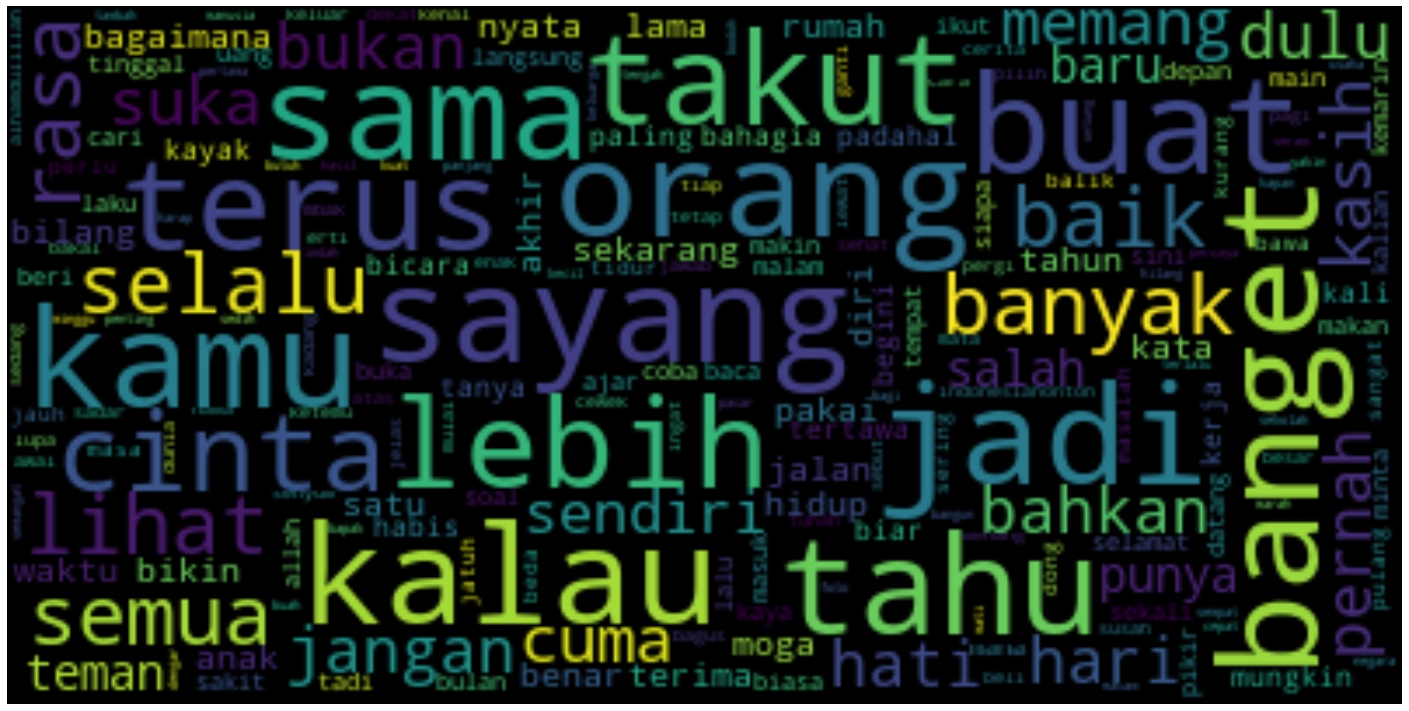

In [72]:
def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

tfidf2 = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf2.columns = ['tfidf']    
plot_word_cloud(tfidf2.sort_values(by=['tfidf'], ascending=True))

In [73]:
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [75]:
train_vecs_w2v = np.concatenate([buildWordVector(z, 100) for z in map(lambda x: x, X_train2)])
train_vecs_w2v = scale(train_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, 100) for z in map(lambda x: x, X_test2)])
test_vecs_w2v = scale(test_vecs_w2v)

print ('shape for training set : ',train_vecs_w2v.shape,
      '\nshape for test set : ', test_vecs_w2v.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


shape for training set :  (3951, 100) 
shape for test set :  (439, 100)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [79]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=100))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               12928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 13,057
Trainable params: 13,057
Non-trainable params: 0
_________________________________________________________________


In [80]:
history = model.fit(train_vecs_w2v, y_train2, epochs=20, batch_size=50,
                   validation_data=(test_vecs_w2v,y_test2))
loss, accuracy = model.evaluate(train_vecs_w2v, y_train2, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_vecs_w2v, y_test2, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
80/80 [==============================] - 0s 3ms/step - loss: 0.8568 - accuracy: 0.2240 - val_loss: 0.7294 - val_accuracy: 0.1891
Epoch 2/20
80/80 [==============================] - 0s 1ms/step - loss: 0.8326 - accuracy: 0.2420 - val_loss: 0.7223 - val_accuracy: 0.1891
Epoch 3/20
80/80 [==============================] - 0s 1ms/step - loss: 0.9337 - accuracy: 0.2331 - val_loss: 0.7157 - val_accuracy: 0.1913
Epoch 4/20
80/80 [==============================] - 0s 1ms/step - loss: 0.8482 - accuracy: 0.2341 - val_loss: 0.7090 - val_accuracy: 0.1959
Epoch 5/20
80/80 [==============================] - 0s 1ms/step - loss: 0.8260 - accuracy: 0.2374 - val_loss: 0.7022 - val_accuracy: 0.1959
Epoch 6/20
80/80 [==============================] - 0s 2ms/step - loss: 0.8643 - accuracy: 0.2326 - val_loss: 0.6951 - val_accuracy: 0.1959
Epoch 7/20
80/80 [==============================] - 0s 1ms/step - loss: 0.8202 - accuracy: 0.2430 - val_loss: 0.6886 - val_accuracy: 0.1959
Epoch 8/20
80/80 [==

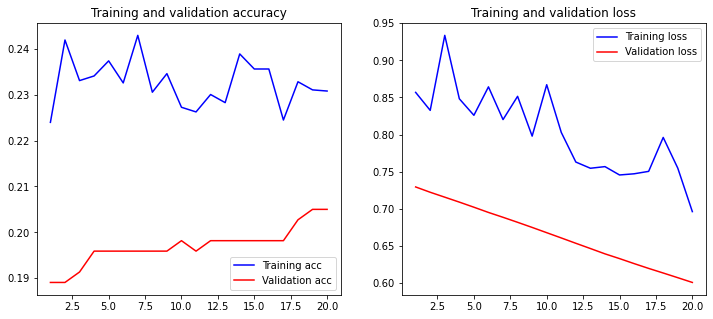

In [81]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [82]:
len_data = [len(x.split()) for x in df_tweets['tweet_norm2']]
print(np.mean(len_data))
print(np.median(len_data))
print(np.std(len_data))
print(np.min(len_data))
print(np.max(len_data))
print(np.percentile(len_data, 98))

17.679498861047836
17.0
6.0867318058937
1
56
30.0


In [83]:
embed_size = 100 # how big is each word vector
max_features = 23000 # how many unique words to use
maxlen = 20 # max number of words in a comment to use

In [84]:
from keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(df_tweets['tweet_norm2'])
list_tokenized_train = tokenizer.texts_to_sequences(df_tweets['tweet_norm2'].values)

In [85]:
list_tokenized_train[0]

[103,
 42,
 3293,
 559,
 4966,
 339,
 4967,
 559,
 105,
 4968,
 25,
 272,
 458,
 1363,
 339,
 103,
 483,
 103,
 351,
 4969,
 236]

In [91]:
index2word_set = set(id_w2v.wv.index2word)
print(id_w2v.most_similar('belajar'))

[('mengajar', 0.8060488700866699), ('mempelajari', 0.7542589902877808), ('berlatih', 0.7312089204788208), ('mempelajarinya', 0.696719229221344), ('mengajarinya', 0.6789499521255493), ('mengajarkan', 0.6630278825759888), ('mengajariku', 0.6590360403060913), ('menimba', 0.6554365158081055), ('mendalami', 0.6528759598731995), ('mengajari', 0.6515275835990906)]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [114]:
word_index = tokenizer.word_index
nb_words = max_features
embedding_matrix = np.zeros((nb_words, embed_size), dtype=np.float32)
unknown_vector = np.zeros((embed_size,), dtype=np.float32) - 1.
for word, i in word_index.items():
    cur = word
    if cur in index2word_set:
        embedding_matrix[i] = id_w2v[cur]
        continue
        
    embedding_matrix[i] = unknown_vector

In [118]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU
from keras.layers import Bidirectional, GlobalMaxPool1D, SpatialDropout1D, GlobalMaxPooling1D, Concatenate
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras import callbacks

from keras import backend as K
from sklearn.metrics import precision_score, recall_score, f1_score

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import initializers, regularizers, constraints, optimizers, layers


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
    
    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def get_model():
    inp = Input(shape=(maxlen,))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(inp)
    x = SpatialDropout1D(0.3)(x)
    x1 = Bidirectional(LSTM(32, return_sequences=True))(x)
    x2 = Bidirectional(GRU(32, return_sequences=True))(x1)
    max_pool1 = GlobalMaxPooling1D()(x1)
    max_pool2 = GlobalMaxPooling1D()(x2)
    conc = Concatenate()([max_pool1, max_pool2])
    x = Dense(1, activation="sigmoid")(conc)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1])
    return model

In [ ]:
RANDOM_STATE = 1
def get_cv():
    return RepeatedStratifiedKFold(
        n_splits=10,
        n_repeats=10,
        random_state=RANDOM_STATE
    )


def set_seed(seed=1):
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.backends.cudnn.deterministic = True

set_seed(seed=RANDOM_STATE)

In [119]:
from sklearn.model_selection import KFold
def get_kfold():
    return KFold(n_splits=5, shuffle=True, random_state=1)

In [120]:
X = X_t
y = df_tweets["label_id"].values

pred_cv = np.zeros(len(y))
count = 0

for train_index, test_index in get_kfold().split(X, y):
    count += 1
    print(count, end='')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    es = callbacks.EarlyStopping(monitor='val_f1', min_delta=0.0001, patience=8,  verbose=1, mode='max', baseline=None, restore_best_weights=True)

    rlr = callbacks.ReduceLROnPlateau(monitor='val_f1', factor=0.5, patience=3, min_lr=1e-6, mode='max', verbose=1)
    
    
    model = get_model()
    model.fit(X_train, 
             y_train, batch_size=16, epochs=4,
             validation_data=(X_test, y_test),
             callbacks=[es, rlr],
             verbose=1)
    
    pred_cv[[test_index]] += model.predict(X_test)[:,0]

1Epoch 1/4


KeyboardInterrupt: 